In [1]:
# https://www.kaggle.com/crowdflower/twitter-airline-sentiment
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2023-07-08 11:48:36--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M  2.56MB/s    in 1.3s    

2023-07-08 11:48:38 (2.56 MB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [4]:
np.random.seed(0)
tf.random.set_seed(0)

In [5]:
df=pd.read_csv('AirlineTweets.csv')

In [6]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
df=df[['airline_sentiment','text']]

In [8]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

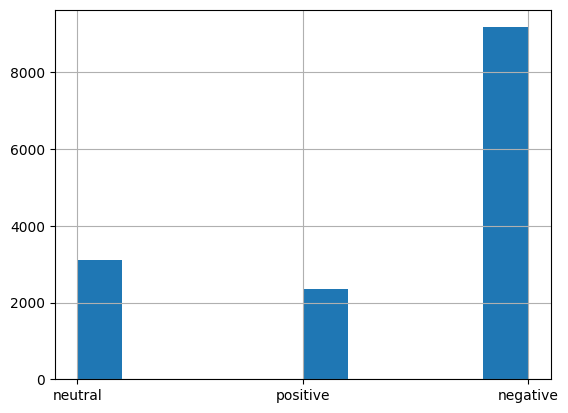

In [9]:
df['airline_sentiment'].hist()

In [10]:
df=df[df['airline_sentiment']!= 'neutral'].copy()

In [11]:
df.head()

,airline_sentiment,text
1,positive,@VirginAmerica plus you've added commercials t...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [12]:
target_map={'positive':1,'negative':0}
df['target']=df['airline_sentiment'].map(target_map)

In [13]:
df.head()

,airline_sentiment,text,target
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [14]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,random_state=0)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=2000)
x_train=vectorizer.fit_transform(df_train['text'])
x_test=vectorizer.transform(df_test['text'])

In [16]:
x_train=x_train.toarray() #data must not be sparse matrix before passing through tensorflow
x_test=x_test.toarray()
y_train=df_train['target']
y_test=df_test['target']

In [17]:
print(x_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
print(y_train)

12087    0
61       0
5891     1
2668     0
9341     0
        ..
6277     0
4082     0
12661    0
13782    0
3403     0
Name: target, Length: 8655, dtype: int64


In [19]:
print(x_test)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.25543232 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.24491858 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [20]:
print(y_test)

2353     0
2446     0
12835    0
3564     0
2912     0
        ..
7448     0
351      0
250      0
3300     0
2476     0
Name: target, Length: 2886, dtype: int64


In [21]:
#input dimmensions
D=x_train.shape[1]

In [22]:
#building model
i=Input(shape=(D,))
x=Dense(1)(i)
model=Model(i,x)

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2000)]            0         
                                                                 
 dense (Dense)               (None, 1)                 2001      
                                                                 
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss=BinaryCrossentropy(from_logits=True),optimizer=Adam(learning_rate=0.01),metrics=['accuracy'])

In [25]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=40)

Epoch 1/40
68/68 [==============================] - 2s 15ms/step - loss: 0.4976 - accuracy: 0.7976 - val_loss: 0.4115 - val_accuracy: 0.7883
Epoch 2/40
68/68 [==============================] - 1s 8ms/step - loss: 0.3720 - accuracy: 0.8024 - val_loss: 0.3528 - val_accuracy: 0.8001
Epoch 3/40
68/68 [==============================] - 0s 7ms/step - loss: 0.3193 - accuracy: 0.8228 - val_loss: 0.3136 - val_accuracy: 0.8285
Epoch 4/40
68/68 [==============================] - 1s 8ms/step - loss: 0.2823 - accuracy: 0.8449 - val_loss: 0.2867 - val_accuracy: 0.8517
Epoch 5/40
68/68 [==============================] - 0s 7ms/step - loss: 0.2551 - accuracy: 0.8638 - val_loss: 0.2672 - val_accuracy: 0.8656
Epoch 6/40
68/68 [==============================] - 1s 8ms/step - loss: 0.2345 - accuracy: 0.8794 - val_loss: 0.2531 - val_accuracy: 0.8770
Epoch 7/40
68/68 [==============================] - 1s 8ms/step - loss: 0.2184 - accuracy: 0.8956 - val_loss: 0.2419 - val_accuracy: 0.8836
Epoch 8/40
68/68 [=

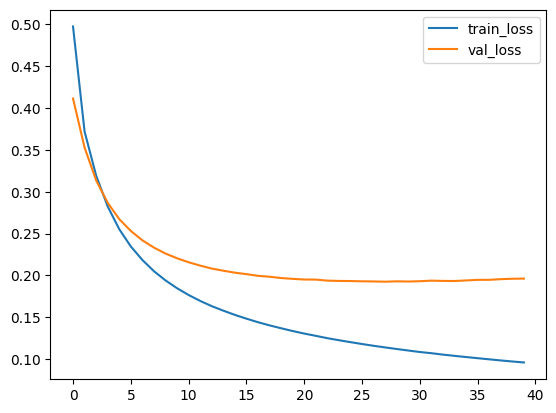

In [26]:
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()   #plotting loss per iteration

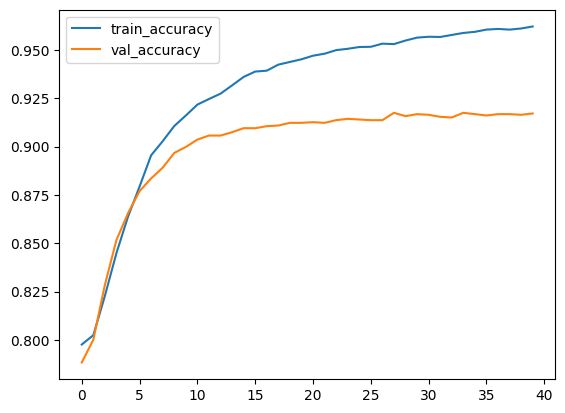

In [27]:
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()   #plotting loss per accuracy

In [28]:
p_train=((model.predict(x_train)>0)*1).flatten()
p_test=((model.predict(x_test)>0)*1).flatten()

91/91 [==============================] - 0s 1ms/step


In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_auc_score
cm=confusion_matrix(y_train,p_train,normalize='true')
cm

array([[0.98870056, 0.01129944],
       [0.09760274, 0.90239726]])

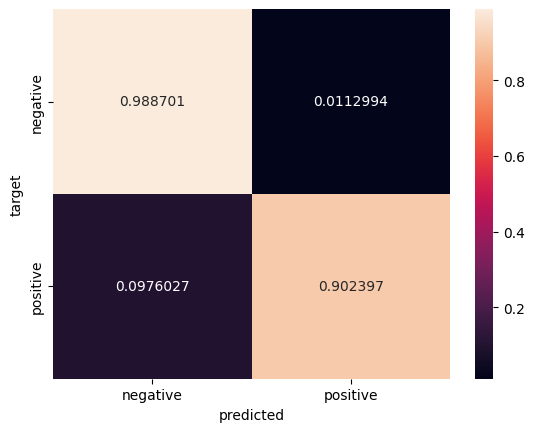

In [30]:
def plot_cm(cm):
  classes=['negative','positive']
  df_cm=pd.DataFrame(cm,index=classes,columns=classes)
  ax=sns.heatmap(df_cm,annot=True,fmt='g')
  ax.set_xlabel('predicted')
  ax.set_ylabel('target')
plot_cm(cm)

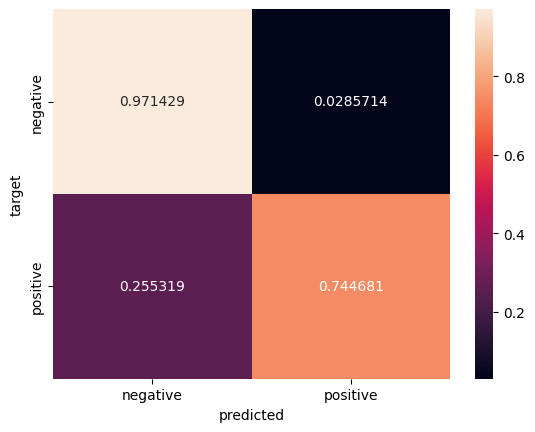

In [31]:
cm_test=confusion_matrix(y_test,p_test,normalize='true')
plot_cm(cm_test)

In [32]:
accuracy_score(y_train,p_train)

0.9712305025996534

In [33]:
accuracy_score(y_test,p_test)

0.9234234234234234

In [34]:
ptrain=model.predict(x_train)
ptest=model.predict(x_test)
print('train auc score=',roc_auc_score(y_train,ptrain))
print('test auc score=',roc_auc_score(y_test,ptest))
print('train f1 score=',f1_score(y_train,p_train))
print('test f1 score=',f1_score(y_test,p_test))

91/91 [==============================] - 0s 1ms/step
train auc score= 0.9942318358704475
test auc score= 0.959557561914354
train f1 score= 0.9270008795074759
test f1 score= 0.8045977011494252


In [35]:
model.layers

In [36]:
model.layers[1].get_weights()

[array([[-3.7695444 ],
        [ 2.7100883 ],
        [ 0.30304357],
        ...,
        [-3.5784273 ],
        [-0.3781118 ],
        [-5.6427298 ]], dtype=float32),
 array([-0.32073256], dtype=float32)]

In [37]:
w=model.layers[1].get_weights()[0]

In [38]:
word_index_map=vectorizer.vocabulary_
word_index_map

{'americanair': 136,
 'checked': 349,
 'in': 930,
 'on': 1240,
 'app': 162,
 'since': 1580,
 'yesterday': 1990,
 'confirmed': 412,
 'upgrade': 1855,
 'amp': 139,
 'carry': 318,
 'got': 812,
 'to': 1761,
 'counter': 440,
 'manager': 1097,
 'upgraded': 1856,
 'somebody': 1609,
 'else': 599,
 'my': 1175,
 'seat': 1525,
 'virginamerica': 1882,
 'called': 299,
 'weeks': 1918,
 'ago': 108,
 'about': 75,
 'adding': 94,
 'flights': 730,
 'from': 768,
 'they': 1731,
 'still': 1655,
 'haven': 850,
 'up': 1851,
 'help': 864,
 'southwestair': 1624,
 'just': 981,
 'received': 1423,
 'your': 1996,
 'birthday': 249,
 'card': 313,
 'it': 963,
 'was': 1899,
 'amazing': 133,
 'and': 141,
 'made': 1084,
 'me': 1108,
 'with': 1949,
 'nice': 1195,
 'thanks': 1721,
 'united': 1842,
 'flight': 718,
 'landed': 1006,
 '50': 57,
 'min': 1140,
 'but': 288,
 'we': 1910,
 'are': 168,
 'being': 236,
 'told': 1765,
 'stay': 1650,
 'the': 1725,
 'plane': 1326,
 'gate': 788,
 'have': 849,
 'little': 1048,
 'no': 1198,

In [39]:
#looking at weight of each word with different threshold values
threshold=2

print('most positive words:')
word_weight_tuples=[]
for word,index in word_index_map.items():
  weight=w[index,0]
  if weight>threshold:
    word_weight_tuples.append((word,weight))
word_weight_tuples=sorted(word_weight_tuples,key=lambda x: -x[1])
for i in range(10):
  word,weight=word_weight_tuples[i]
  print(word,weight)

most positive words:
thank 9.61767
thanks 9.45356
worries 7.8081756
love 7.4535713
great 7.2735248
kudos 6.906483
awesome 6.7673016
amazing 6.702283
wonderful 6.153962
excellent 5.964417


In [40]:
print('most negative words:')
word_weight_tuples=[]
for word,index in word_index_map.items():
  weight=w[index,0]
  if weight<-threshold:
    word_weight_tuples.append((word,weight))
word_weight_tuples=sorted(word_weight_tuples,key=lambda x: -x[1])
for i in range(10):
  word,weight=word_weight_tuples[i]
  print(word,weight)

most negative words:
dropped -2.000994
ktn -2.0075006
carry -2.0131476
entire -2.0134227
said -2.0180192
speaking -2.018377
consider -2.020441
last -2.0213687
wasn -2.0222511
express -2.0287862
